# Comparing ERA5 and 449MHz profiler data (from Zarr)
Making a comparison of ERA5 and 449MHz profiler data from Zarr stores (pilot study).

### Imports

In [1]:
import xarray as xr
from scipy.interpolate import interp1d

lustre_scratch  = "/lustre/desc1/scratch/myasears"

### Read in zarr stores

In [2]:
era5_test_zarr = xr.open_zarr(f"{lustre_scratch}/2023_M2HATS/era5_M2HATS_ISS1_heights.zarr")
prof449Mhz_test_zarr = xr.open_zarr(f"{lustre_scratch}/2023_M2HATS/prof449_M2HATS_ISS1_winds30.zarr")

### Interpolate datasets to the same grid
We want an hourly time grid + a 200m height grid. ERA5 is on time, but not height; prof449 is on height, but not time. 

#### 449 interpolation

In [3]:
# Interpolate the ERA5 dataset onto the 449 time grid
prof449_interp = prof449Mhz_test_zarr.interp(time=era5_test_zarr['time'])

#### ERA5 interpolation
Completed in pre-processing; Zarr file is in terms of height coordinates, instead of pressure levels. 

### Combine datasets

### Visualize comparison
Visualize the differences between Profiler 449 data and ERA5 reanalysis data on the same height and time level for the entire M2HATS field campaign. 

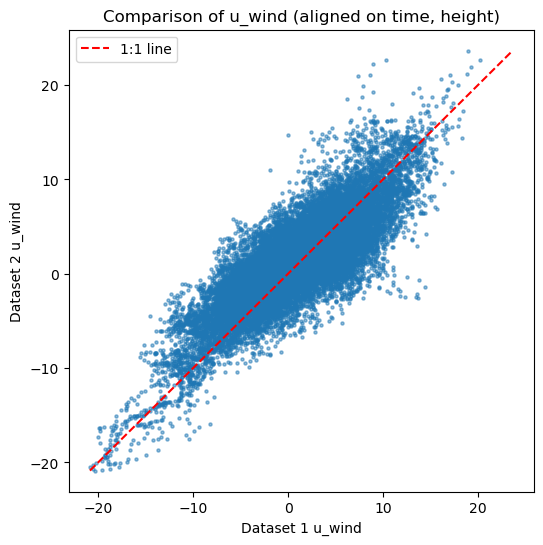

In [7]:
import matplotlib.pyplot as plt
import numpy as np

ds1 = prof449_interp
ds2 = era5_test_zarr

# Suppose your datasets are called ds1 and ds2
# Pick the variable to compare
var = "u_wind"

# Extract values aligned on (time, height_msl)
x = ds1[var].values.ravel()  # flatten to 1D
y = ds2[var].values.ravel()

# Optional: mask out NaNs so scatter looks clean
mask = ~np.isnan(x) & ~np.isnan(y)
x = x[mask]
y = y[mask]

# Scatter plot
plt.figure(figsize=(6,6))
plt.scatter(x, y, s=5, alpha=0.5)

# Add a 1:1 reference line
lims = [min(x.min(), y.min()), max(x.max(), y.max())]
plt.plot(lims, lims, "r--", label="1:1 line")

plt.xlabel("Dataset 1 u_wind")
plt.ylabel("Dataset 2 u_wind")
plt.title("Comparison of u_wind (aligned on time, height)")
plt.legend()
plt.show()